# Introduction to Newtork Analysis in NetworkX

$ by \ Georgy \ Lazarev \ $  **(mlcourse slack: jorgy)**

Systems are ubiquitous these days in various fields of science, industry and daily-life situations. Majority of them (to name few, social interactions, telephone and transport networks) can be represented as networks or graphs (sets of nodes and edges where nodes cahracetrize certain objects and edges indicate some kind of connection between them) and therefore are suitable for analysis. 

We might want to analyze relationships between participants or actor in those systems to get some valuable insights:

- Which nodes are more important (influencers in network)
- Pathfinding – determining shortest paths between certain nodes
- Structure - finding cliques, community detection (we'll discuss those terms later)

Let's start with some basic things. At first you need to install NetworkX (*'pip install networkx'* or *'conda install ..'* if you are working under Anaconda)

In [279]:
#importing necessary packages
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
import numpy as np
%matplotlib inline
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

In [280]:
#creating empty Graph
G = nx.Graph()

#you can now add nodes and edges
G.add_node('a')
G.add_node(1)
G.add_edge('a',1)
#or creating list of nodes/edges in advance
G.add_nodes_from([2,3,4])
G.add_edges_from([(2,4),('a',3)])

In [281]:
#setting attribute while creating node
G.add_node('John', age=26)

#setting attribute to already existing node
G.node['John']['hobby']='writing music'
nx.set_node_attributes(G,'number',7)

#graph with random weghts
weights={}
for e in G.edges():
    G[e[0]][e[1]]['weight']=np.random.random()

In [282]:
print(G.edges())
print(G.edges(data=True))
#data=True prints attributes too

[('a', 1), ('a', 3), (2, 4)]
[('a', 1, {'weight': 0.18081741247008243}), ('a', 3, {'weight': 0.41132203365619135}), (2, 4, {'weight': 0.3801032752964213})]


In [283]:
display(type(G))

networkx.classes.graph.Graph

In [284]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 3
Average degree:   1.0000


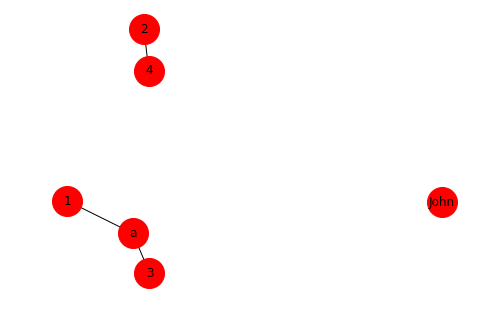

In [285]:
nx.draw(G,with_labels=True,node_size=900)

It's probably worth mentioning that calling .draw without specifying *pos* argument will result in different layouts of nodes.

## Analysis of real graph

[Here](http://konect.uni-koblenz.de/networks/) you can find real networks stored as graph representations (edgelist mostly) in .tsv format. For simplicity I picked 
quite small undirected [graph](https://www.dropbox.com/s/4n86gethjw98gqk/out.dolphins?dl=0), which represent frequent social interactions between 62 dolphins from community living off Doubtful Sound,
a fjord in New Zealand. So this is sort of social network.

Reading graphs from files doesn't have unified way as data can be stored in different formats and graphs can be represented differently (adjacency matrix, edge lists, adjacency list). I'd recommend you go for reference [here](https://networkx.github.io/documentation/networkx-1.10/reference/convert.html) and [here](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)

In [286]:
edges = []
with open('datasets/out.dolphins', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    next(filereader) # we'll skip header row
    for row in filereader:
            edges.append(row[:2])
edges[:5]

[['9', '4'], ['10', '6'], ['10', '7'], ['11', '1'], ['11', '3']]

In [287]:
#now create graph from edgelist we made in previous step
GD = nx.from_edgelist(edges)

In [288]:
print(nx.info(GD))

Name: 
Type: Graph
Number of nodes: 62
Number of edges: 159
Average degree:   5.1290


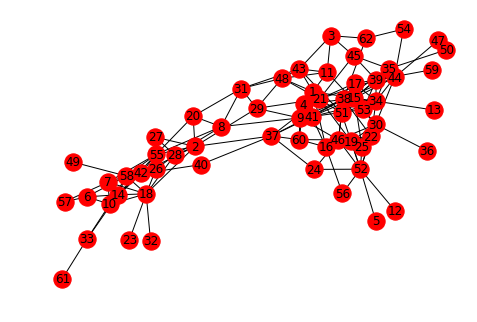

In [289]:
nx.draw(GD,with_labels=True)

There are other types of vizualization except usual one (especially useful when you are dealing with large graphs) - ArcPlot, MatrixPlot and etc. I'll show only one  here - CircosPlot
Let's install and import nice visualization package for NetworkX - [nxviz](https://github.com/ericmjl/nxviz). 

In [290]:
import nxviz as nv

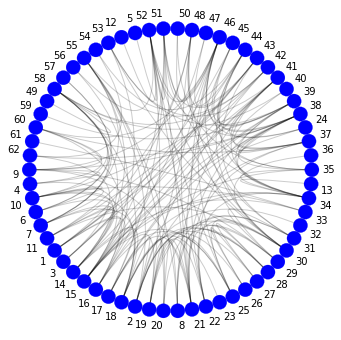

In [291]:
c=nv.CircosPlot(GD,node_labels=True)
c.draw()

That was fast :-) Now let's dive into analysis of our dolphins social graph

In [292]:
#.has_edge method allows us to check presence of direct interaction between two nodes

GD.has_edge('40','37')

True

In [293]:
print('shortest path from node 12 to 5 is of length', nx.shortest_path_length(GD,'12','5'),":", nx.shortest_path(GD,'12','5'))

shortest path from node 12 to 5 is of length 2 : ['12', '52', '5']


For every vertex in graph we can calculate its degree – number of adjacent (connected by an edge )vertices.

In [294]:
display(list(GD.neighbors('9')))
print('node 9 has %d neighbors' %GD.degree()['9'])

['4', '21', '29', '38', '46', '60']

node 9 has 6 neighbors


In [295]:
GD.degree()
#returns dictionary with all nodes

DegreeView({'9': 6, '4': 3, '10': 7, '6': 4, '7': 6, '11': 5, '1': 6, '3': 4, '14': 8, '15': 12, '16': 7, '17': 6, '18': 9, '2': 8, '19': 7, '20': 4, '8': 5, '21': 9, '22': 6, '23': 1, '25': 6, '26': 3, '27': 3, '28': 5, '29': 5, '30': 9, '31': 5, '32': 1, '33': 3, '34': 10, '13': 1, '35': 5, '36': 1, '37': 7, '24': 3, '38': 11, '39': 8, '40': 2, '41': 8, '42': 5, '43': 6, '44': 7, '45': 4, '46': 11, '47': 2, '48': 6, '50': 2, '51': 7, '52': 10, '5': 1, '12': 1, '53': 4, '54': 2, '55': 7, '56': 2, '57': 2, '58': 9, '49': 1, '59': 1, '60': 5, '61': 1, '62': 3})

In [296]:
# find 5 nodes with largest amount of neighbors
sorted(dict(GD.degree()).items(), key=lambda x:x[1], reverse=True)[:5]

[('15', 12), ('38', 11), ('46', 11), ('34', 10), ('52', 10)]

That brings us to several types of centrality - metric for describing importance of a node

### Degree centrality

$$ degree   \  centrality = \frac {degree\ of\ node} {number\ of \ nodes\ in \ network} $$

In [297]:
#We create dictionary with nodes and their degree centralities
degcent=nx.degree_centrality(GD) #for getting dictionary with nodes and 
                                  #their degree centralities as keys and values respectively

print("Networkx degree centrality for node 16:",degcent['16'])

Networkx degree centrality for node 16: 0.11475409836065574


Let's see 5 nodes with largest degree centrality:

In [298]:
sorted(degcent.items(), key=lambda x: x[1], reverse=True)[:5]

[('15', 0.19672131147540983),
 ('38', 0.18032786885245902),
 ('46', 0.18032786885245902),
 ('34', 0.1639344262295082),
 ('52', 0.1639344262295082)]

In [299]:
#we'll store node with the largest degree centraliy as 'nld '
nld=sorted(degcent.items(), key=lambda x: x[1], reverse=True)[:1][0][0]

Here goes sort of vizualization of this node:

In [300]:
palette = sns.color_palette('coolwarm',2).as_hex()
palette

['#aac7fd', '#f7b89c']

In [301]:
#this list wi'll be used in .draw call.
node_colors=[palette[0] if n!=nld else palette[1] for n in GD.nodes() ]

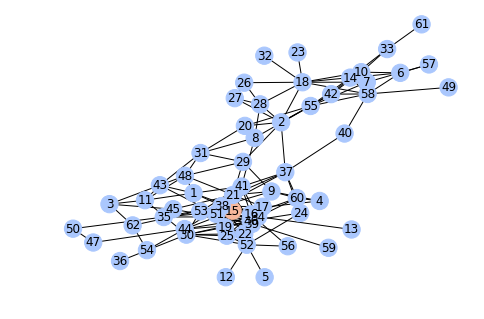

In [302]:
nx.draw(GD,node_color=node_colors,with_labels=True)

As mentioned above you can set attributes to nodes. Let's say we want each node to keep its degree as (one of) attribute:

In [303]:
for n in GD.nodes():
    GD.node[n]['degree centrality'] = degcent[n]

Now we can use it in customizing our vizualization:

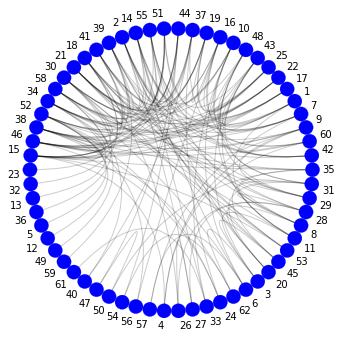

In [304]:
c=nv.CircosPlot(GD,node_order='degree centrality',node_labels=True)
c.draw()

### Closeness centrality

$$closeness   \  centrality = \frac {N\ -\ 1} {sum\ of \ distances\ to \ each \ node \ from \ current \ one}$$

where $N = $ number of nodes

Compares how many steps (edges) it would take to reach every other node in a network (using shortest paths obviously).
Intuitively you can think of this as of 'average distance' to all other nodes.

Degree centrality takes into account only direct connections thus deluding analyst sometimes as current node can be central only in local neighborhood. That's why closeness centrality is important.

In case pf being not fully connected, this algorithm computes the closeness centrality for each connected component separately.
By the way, you can see connected parts of your graph this way (in our case graph is itself connected):

In [305]:
for comp in nx.connected_components(GD):
    print(comp)

{'13', '17', '36', '42', '47', '32', '52', '48', '7', '5', '15', '24', '30', '8', '59', '57', '38', '49', '34', '23', '26', '53', '2', '11', '18', '46', '20', '45', '3', '50', '60', '1', '37', '56', '19', '51', '25', '31', '27', '12', '58', '62', '33', '14', '22', '44', '28', '9', '43', '6', '61', '35', '4', '16', '41', '10', '21', '39', '55', '54', '29', '40'}


In [306]:
#calculating closeness centrality for each node
clocent = nx.closeness_centrality(GD)

In [307]:
sorted(clocent.items(), key=lambda x: x[1], reverse=True)[:5]

[('37', 0.4178082191780822),
 ('41', 0.40397350993377484),
 ('38', 0.39869281045751637),
 ('21', 0.391025641025641),
 ('15', 0.3765432098765432)]

In [308]:
for n in GD.nodes():
    GD.node[n]['closeness centrality'] = clocent[n]

In [309]:
nlcc=sorted(clocent.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette = sns.color_palette('coolwarm',2).as_hex()
node_colors=[palette[0] if n!=nlcc else palette[1] for n in GD.nodes() ]

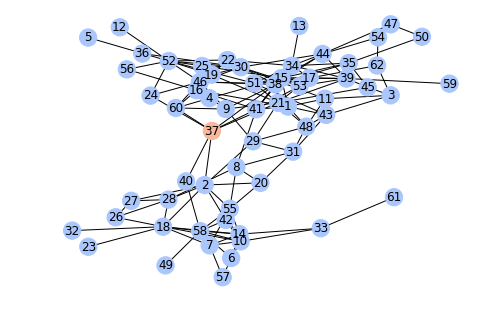

In [310]:
nx.draw(GD,node_color=node_colors,with_labels=True)

### Betweeness Centrality

We can calculate shortest path for each pair of node (if they belong to one connected component obviously).
So betweeness centrality of a node indicates to how often this current node becomes a part of all shortest paths.

$$betweeness   \  centrality = \frac {number \ of \ shortest \ paths \ passing \ throught \ current \ node } {totul \ number \ of \ shortest \ paths}$$

Intuitively betweeness centrality can be thought of as measure of node influence in network. For example, members of a group with 'big' influence can be useful in terms of spreading a message/information. As an other example - in telecommunication network a node with largest betweeness centrality has biggest control due to amount information transferring through it.

In [311]:
betcent = nx.betweenness_centrality(GD)
for n in GD.nodes():
    GD.node[n]['betweeness centrality'] = betcent[n]

sorted(betcent.items(), key=lambda x: x[1], reverse=True)[:5]

[('37', 0.24823719602893804),
 ('2', 0.213324435532811),
 ('41', 0.14314951834261747),
 ('38', 0.13856978865859435),
 ('8', 0.11823861926938342)]

In [312]:
nlbc=sorted(clocent.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette = sns.color_palette('coolwarm',2).as_hex()
node_colors=[palette[0] if n!=nlbc else palette[1] for n in GD.nodes() ]

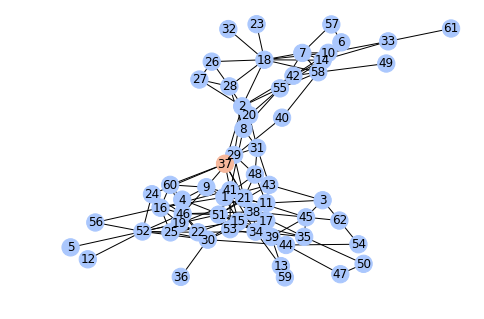

In [313]:
nx.draw(GD,node_color=node_colors,with_labels=True)

$Betweeness \ centrality \ for \ edges$

I guess, this term doesn't need an explanation as its meaning is almost the same as for node

In [314]:
betcent_e=nx.edge_betweenness_centrality(GD)
sorted(betcent_e.items(), key=lambda x: x[1], reverse=True)[:5]

[(('2', '37'), 0.14963002250231947),
 (('8', '41'), 0.11583748083552335),
 (('18', '2'), 0.09736232147230936),
 (('37', '38'), 0.09553804999570528),
 (('37', '40'), 0.09162347458612637)]

In [315]:
for e in GD.edges():
    GD[e[0]][e[1]]['betweeness centrality']=betcent_e[e]

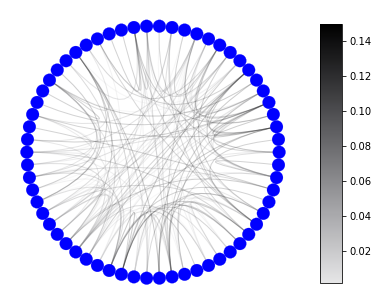

In [316]:
#the bigger is betweeness centrality - the darker are edges 
c=nv.CircosPlot(GD,edge_color='betweeness centrality')
c.draw()

In [317]:
elbc=sorted(betcent_e.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette=['#bd3c14','#009688']
edge_colors=[palette[0] if e!=elbc else palette[1] for e in GD.edges() ]

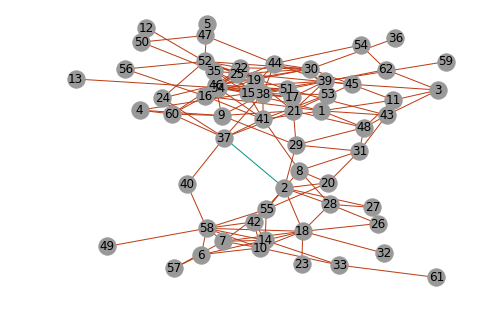

In [318]:
nx.draw(GD,edge_color=edge_colors,with_labels=True,node_color='#999999')

The green edge is the one with the largest betweeness centrality. Colors are quite distinguishable, I hope :-)

### Eigenvector Centrality

OK, I tried to avoid this but here is real formula without words:

$$ Ax = \lambda x $$

A is adjacency matrix of graph, (one of the (if not the one) most-used representation of graph) - NxN matrix where values in intersections of columns and rows corresponds to connection between respective nodes. Non-zero values stand for connection between nodes (in case of unweighted graph 1 is the only option) and zero does mean nodes are not directly connected.
$ \lambda $ is egenvalue of A and  the largest eigenvalue associated with the eigenvector of the adjacency matrix A 

Importance of a node depends on the importance of its neighbors. 


In [319]:
eigcent = nx.eigenvector_centrality_numpy(GD)
sorted(eigcent.items(), key=lambda x: x[1], reverse=True)[:5]

[('15', 0.315782849492371),
 ('38', 0.3005620546775489),
 ('46', 0.285005215284693),
 ('34', 0.2810986921916834),
 ('51', 0.21769179093967783)]

In [320]:
for n in GD.nodes():
    GD.node[n]['eigenvector centrality'] = eigcent[n]

In [321]:
#you can use this function for colouring nodes according to their values of given attribute
def attribute_color(G,attribute):
    attrs=[G.node[n][attribute] for n in G.nodes()]
    uattrs=sorted(list(set(attrs)))
    palette = sns.color_palette('Blues',len(uattrs)).as_hex()
    colmap=dict(zip(uattrs,palette))
    node_colors=[colmap[at] for at in attrs]
    nx.draw(G,node_color=node_colors,with_labels=True)

Let's see all four types of centrality in one picture. Darker shades of blue corresponds to bigger values of metric

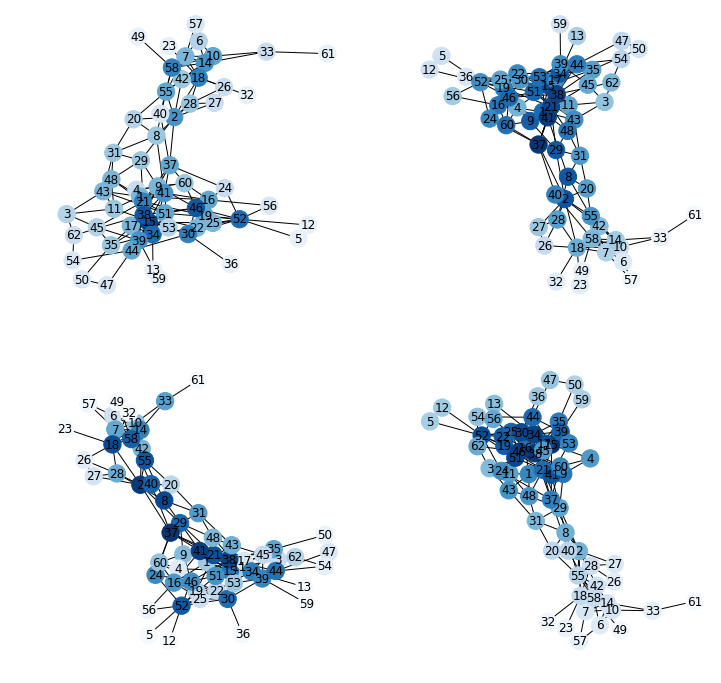

In [322]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(221)
attribute_color(GD,'degree centrality')
plt.subplot(222)
attribute_color(GD,'closeness centrality')
plt.subplot(223)
attribute_color(GD,'betweeness centrality')
plt.subplot(224)
attribute_color(GD,'eigenvector centrality')

## Link Prediction

If we have infromation about social network at this given moment we might want to try to predict which new interaction are more likely to happen in future.


### Jaccard coefficient

To find pair of nodes which are 'similar' to each other we can use the Jaccard coefficient 
It measures what proportion of neighbors a pair of nodes share.

$$Jaccard _{uv}  = \frac { |N_u \cap N_v |} {|N_u\ \cup \ N_v|}$$

where $N_u$ - set of neighbors of node $u$

In [323]:
jc = nx.jaccard_coefficient(GD)
jcd = {}
for u, v, p in jc:
    jcd[(u,v)] = p

In [324]:
len(jcd)

1732

How much pair of nodes have a probablity higher than 0.5 to connect in nearest future?

In [325]:
len([(u,v) for u,v in jcd.keys() if jcd[(u,v)]>0.5])

4

In [326]:
#let's see those pairs
[(u,v) for u,v in jcd.keys() if jcd[(u,v)]>0.5]

[('32', '23'), ('42', '7'), ('7', '6'), ('5', '12')]

In [327]:
#let's vizualize nodes that are most likely to interact the same way as with nodes before
ejc=sorted(jcd.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette = sns.color_palette('coolwarm',2).as_hex()
node_colors=[palette[0] if n not in ejc else palette[1] for n in GD.nodes() ]

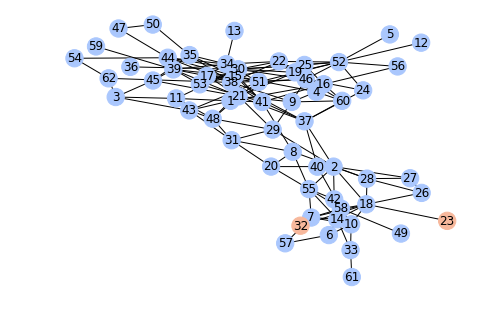

In [328]:
nx.draw(GD,node_color=node_colors,with_labels=True)

### Preferential Attachment

In the other approach to link prediction nodes with high degree will be the ones to be more likely to get future connections. 

$$
PA _{uv}  = { |N_u \cap N_v |} \ or \ {deg_u * deg_v}
$$

In [329]:
pa = nx.preferential_attachment(GD)
pad = {}
for u, v, p in pa:
    pad[(u,v)] = p

In [330]:
sorted(pad.items(), key=lambda x:x[1], reverse=True)[:5]

[(('15', '46'), 132),
 (('52', '15'), 120),
 (('52', '38'), 110),
 (('34', '46'), 110),
 (('15', '30'), 108)]

You can scale it though :-)

In [331]:
epa=sorted(pad.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette = sns.color_palette('coolwarm',2).as_hex()
node_colors=[palette[0] if n not in epa else palette[1] for n in GD.nodes() ]

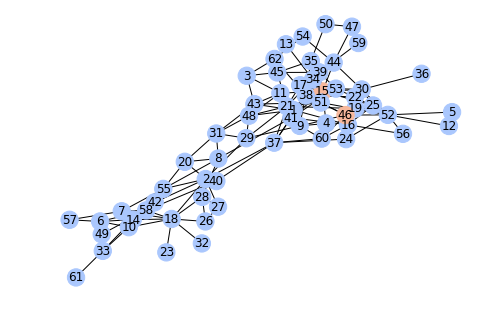

In [332]:
nx.draw(GD,node_color=node_colors,with_labels=True)

### Resource Allocation

$$RA _{uv}  =  \sum_{w\in N_u \cap N_v} { \frac { 1} {deg_w } }$$

Inspiration for proposing this similarity measure is following: we consider two nodes $u$ and $v$, where $u$ can allocate resources to $v$ (as well as the other way around), through their common neighbors (transmitters). We assume that each node has one resource only which it assigns to its neighbors evenly. Thus the expression above is used for calculating amount of resources node can get from the other one. 
There is one very similar method proposed for measuring probability of interaction - *Adamic/Adar (AA)*. The difference is that the latter one has logarithm in denominator. So RA penalizes high-degree neigbours more.

[Here](https://networkx.github.io/documentation/stable/reference/algorithms/link_prediction.html) you can find all implemented similarity indexes in NetworkX.

In [333]:
ra = nx.resource_allocation_index(GD)
rad = {}
for u, v, p in ra:
    rad[(u,v)] = p

In [334]:
sorted(rad.items(), key=lambda x:x[1], reverse=True)[:5]

[(('52', '16'), 0.9004329004329005),
 (('7', '6'), 0.878968253968254),
 (('18', '27'), 0.6583333333333333),
 (('26', '2'), 0.6444444444444444),
 (('46', '37'), 0.6242424242424243)]

In [335]:
era=sorted(rad.items(), key=lambda x: x[1], reverse=True)[:1][0][0]
palette = sns.color_palette('coolwarm',2).as_hex()
node_colors=[palette[0] if n not in era else palette[1] for n in GD.nodes() ]

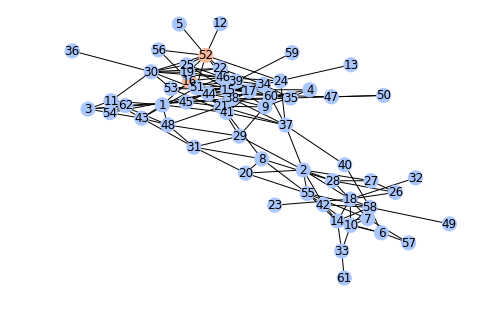

In [336]:
nx.draw(GD,node_color=node_colors,with_labels=True,node_size=200)

## Structure analysis

### Cliques

Cliques in network analysis - completely connected graphs (or subset of nodes). Maximal cliques is such cliques that stop being cliques with addition of any single edge.

In [337]:
len(list(nx.find_cliques(GD)))

84

In [338]:
list(nx.find_cliques(GD))[:5]

[['13', '34'],
 ['32', '18'],
 ['36', '30'],
 ['42', '58', '14', '55'],
 ['42', '58', '14', '10']]

Yes, edge is also under a definition of clique.
And just so you knew  this algorithm is not suitable for directed graph (as [documentation](https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.clique.find_cliques.html) states)

In [339]:
from networkx.algorithms.community import k_clique_communities

*k_clique_communities* return a list of groups, each produced by combining all k-size cliques sharing $k-1$ nodes. This represents the concept of *clique percolation method* that allows for discovering overlapping structure of network by detecting fully-connected subgraphs of $k$ nodes. Two $k$ - cliques are considered adjacent if they share $k$ neighbours.

In [340]:
list(k_clique_communities(GD, 3, cliques=None))

[frozenset({'10',
            '14',
            '18',
            '2',
            '20',
            '31',
            '33',
            '42',
            '55',
            '58',
            '6',
            '7',
            '8'}),
 frozenset({'1',
            '15',
            '16',
            '17',
            '19',
            '21',
            '22',
            '24',
            '25',
            '30',
            '34',
            '35',
            '37',
            '38',
            '39',
            '4',
            '41',
            '44',
            '45',
            '46',
            '51',
            '52',
            '53',
            '60',
            '9'}),
 frozenset({'1', '11', '21', '29', '3', '31', '43', '48', '9'}),
 frozenset({'18', '2', '26', '27', '28'})]

### Community Detection

Different groups of nodes seem to be more densely connected internally rather than externally, which makes them called “communities”. In the past decade the problem of graph partitioning into number of groups attracted a lot of interest from physics and statisticians. This field of study, commonly called ‘community detection’, now includes growing number of papers suggesting new algorithms and methods and modifications of existing ones. The importance of community detection is quite obvious as it allows for analyzing the structure of networks, to make visualization more clear, to make certain conclusions or predictions based on analysis. To note, before detection a number of communities is uncertain, which makes the difference between community detection and clustering, where an amount of clusters is given intentionally. Moreover, communities can differ by size and density, can incorporate hierarchical structure. 

So, networkX package for community detection has an algorithm based on [this paper](https://arxiv.org/pdf/cond-mat/0112110.pdf).

In [341]:
from networkx.algorithms.community import girvan_newman

The idea of Girvan Newmann algorithm is that at each step edges with highest betweeness are removed thus separating graph into densely connected parts.

In [342]:
gn = girvan_newman(GD)
#returns an iterator over tuples of communities.

So each tuple is a partition of a graph at current level of algorithm. At the last iteration all nodes themselves are communities:

In [343]:
len(list(gn)[-1])
#as you might remember there are 62 nodes in our network

62

Let's see a state of partition at the second iteration:

In [344]:
gn = girvan_newman(GD)
next(gn)
second_iteration= tuple(sorted(c) for c in next(gn))

In [345]:
print(second_iteration)

(['1', '11', '12', '13', '15', '16', '17', '19', '21', '22', '24', '25', '29', '3', '30', '31', '34', '35', '36', '37', '38', '39', '4', '41', '43', '44', '45', '46', '47', '48', '5', '50', '51', '52', '53', '56', '59', '60', '9'], ['10', '14', '18', '2', '20', '23', '26', '27', '28', '32', '33', '40', '42', '49', '55', '57', '58', '6', '61', '7', '8'], ['54', '62'])


In [346]:
from seaborn import color_palette

With a little help ~~from my friends~~  of this function you can make coloured vizualization of communities:

In [347]:
def colour_communities(G,partition):
    commap={}
    for n in G.nodes():
        for i, c in enumerate(partition):
                if n in c:
                    commap[n] = i
                    G.node[n]['community']=i
    cs=[G.node[n]['community'] for n in G.nodes()]
    ucs=list(set(cs))
    palette = color_palette('coolwarm',len(ucs)).as_hex()
    colmap=dict(zip(ucs,palette))
    node_colors=[colmap[c] for c in cs]
    
    return node_colors, colmap, palette

In [348]:
#store partitions at first four iterations
gn = girvan_newman(GD)
first_iteration= tuple(sorted(c) for c in next(gn))
second_iteration=tuple(sorted(c) for c in next(gn))
third_iteration=tuple(sorted(c) for c in next(gn))
fourth_iteration=tuple(sorted(c) for c in next(gn))

In [349]:
[len(part) for part in list(first_iteration)]

[41, 21]

First iteration - two communities consisting of 41 and 21 nodes.

In [350]:
display([len(part) for part in list(second_iteration)])
display([len(part) for part in list(third_iteration)])
display([len(part) for part in list(fourth_iteration)])

[39, 21, 2]

[32, 21, 7, 2]

[20, 21, 7, 12, 2]

Now pictures!

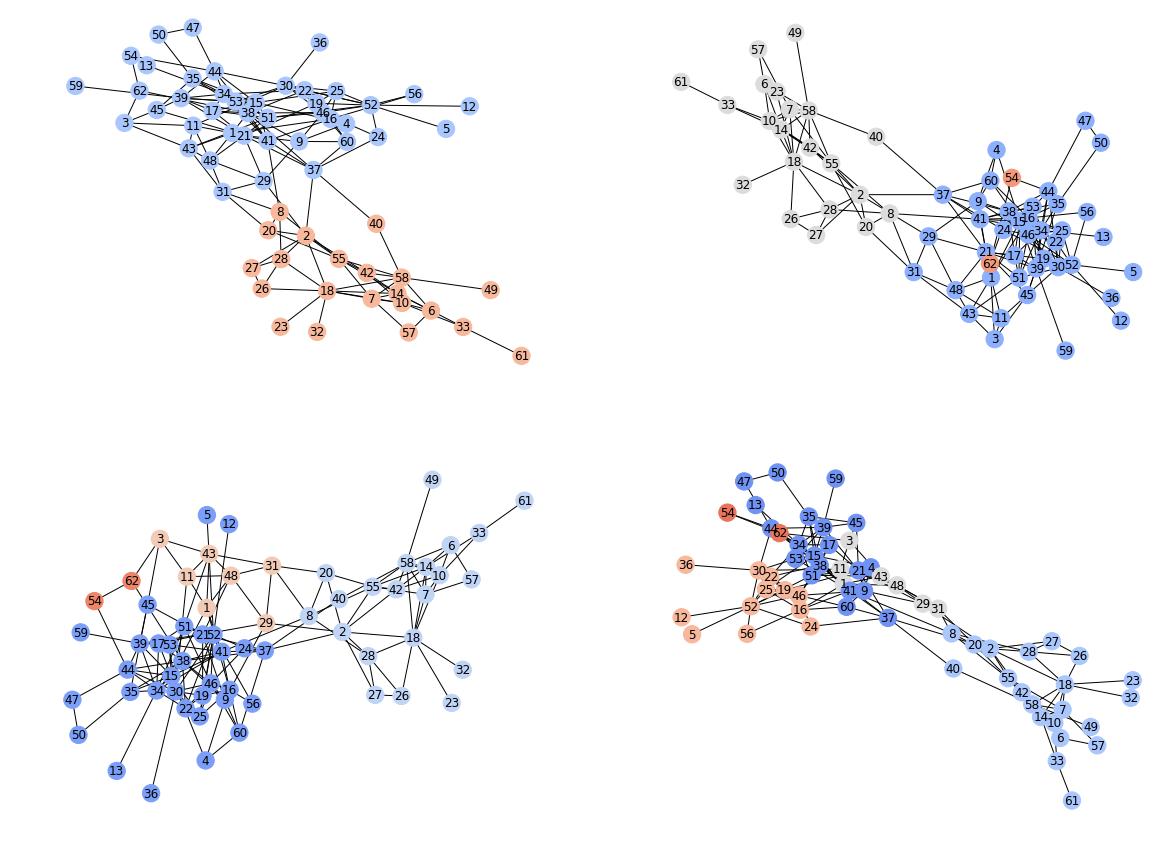

In [351]:
fig = plt.figure(figsize=(20, 15))


plt.subplot(221)
node_colors, color_map, palette = colour_communities(GD, first_iteration)
nx.draw(GD, node_color=node_colors, with_labels=True)
plt.subplot(222)
node_colors, color_map, palette = colour_communities(GD, second_iteration)
nx.draw(GD, node_color=node_colors, with_labels=True)
plt.subplot(223)
node_colors, color_map, palette = colour_communities(GD, third_iteration)
nx.draw(GD, node_color=node_colors, with_labels=True)
plt.subplot(224)
node_colors, color_map, palette = colour_communities(GD, fourth_iteration)
nx.draw(GD, node_color=node_colors, with_labels=True)

### Subgraph

When you have a large graph but want to vizualize or analyze only a small portion of it it can be helpful to extract nodes of interest and corresponding edges. Thats what subgraph is about.

For example, let's construct a subgraph based on node with the largest degree and its neigbours

In [352]:
sorted(dict(GD.degree()).items(), key=lambda x:x[1], reverse=True)[:1]

[('15', 12)]

In [353]:
nbrs=list(GD.neighbors('15'))
nbrs

['1', '4', '17', '25', '34', '35', '38', '39', '41', '44', '51', '53']

In [354]:
#don't forget to include your node of interest
nbrs.append('15')

In [355]:
GD_sub15=GD.subgraph(nbrs)
print(nx.info(GD_sub15))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 29
Average degree:   4.4615


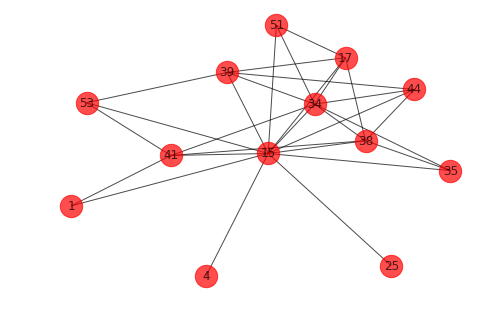

In [356]:
nx.draw(GD_sub15,with_labels=True,alpha=0.7,node_size=500)

## Bipartite graphs

Bipartite graphs - graphs such that:
 - partitioned into two sets (each node belong to one of the two groups)
 - node can be connected only to node from other set
 
 
 As an example of bipartite graph you can imagine a graph consisting of two sets: customers and products they purchase, website users and movies they leave reviews to.

In networkX bipartite concept can be implemented by keyword *bipartite* when specifying metadata for nodes (or by any attribute name you want).

Now I took [graph](https://www.dropbox.com/s/mnxzbndbxq1dif5/out.brunson_club-membership_club-membership?dl=0) from the [same source](http://konect.uni-koblenz.de/networks/). It's also real but still toy (in a way) example. Network consists of 40 nodes - 25 corporate executive officers and 15 social organizations they are members of. And each edge (in the amount of 95) tells that current person has a membership status in corresponding club.

In [357]:
edges = []
with open('datasets/out.brunson_club-membership_club-membership', 'r') as f:
    filereader = csv.reader(f, delimiter=" ", quotechar='"')
    next(filereader) # skips header row
    next(filereader)
    for row in filereader:
        edges.append(row[:2])

In [358]:
# in original format each set of nodes begins from 1.. so for the sake of distinguishability this is what I came to 
for edge in edges:
    edge[0]='m'+edge[0]
    edge[1]='c'+edge[1]

In [359]:
edges[:5]

[['m1', 'c1'], ['m1', 'c2'], ['m1', 'c3'], ['m2', 'c1'], ['m2', 'c4']]

In [360]:
CM=nx.Graph()

In [361]:
clubs=['c'+str(i+1) for i in range(15)]
members=['m'+str(i+1) for i in range(25)]

In [362]:
CM.add_nodes_from(clubs,bipartite='clubs')
CM.add_nodes_from(members,bipartite='members')
CM.add_edges_from(edges)

In [363]:
top = nx.bipartite.sets(CM)[0]
pos = nx.bipartite_layout(CM, top,scale=7)

In [364]:
print(nx.info(CM))

Name: 
Type: Graph
Number of nodes: 40
Number of edges: 95
Average degree:   4.7500


Bipartite graphs can be visualized the following way:

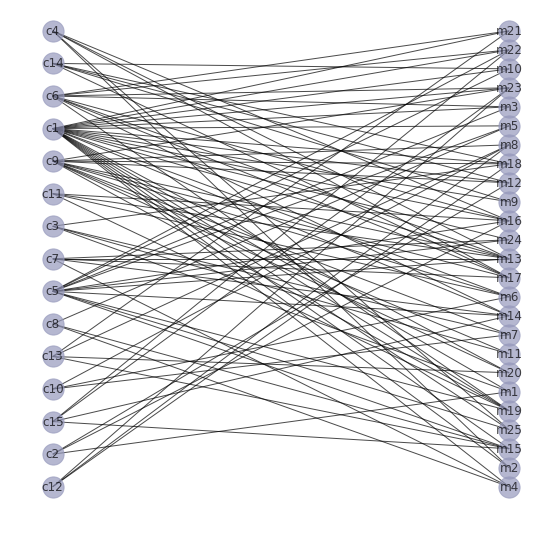

In [365]:
fig = plt.figure(figsize=(7, 7))
nx.draw(CM,pos,node_color='#9699bc',alpha=0.7,with_labels=True,aspect_ratio=0.1,node_size=450)

Now it'a time to show application (kind of) of biparite graph - recommendations. As well as graph our task will be relatively toy. Let's try to recommend to person a organization to join based on similar persons. (similarity between persons is measured based on organization they have membership of.

In [366]:
#function that produces the set of clubs both persons are going to
def shared_partition_nodes(G,mbr1,mbr2):
    nbrs1 = G.neighbors(mbr1)
    nbrs2 = G.neighbors(mbr2)
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap
def member_similarity(G, mbr1, mbr2):
    shared_nodes = shared_partition_nodes(G,mbr1,mbr2)
    return len(shared_nodes) / len(clubs)

In [367]:
shared_partition_nodes(CM,'m3','m5')

{'c1', 'c5'}

In [368]:
member_similarity(CM,'m3','m5')

0.13333333333333333

In [374]:
def most_similar_members(G, member,thr=0.14):  # you can specify the threshold
    mbrs=members.copy()
    mbrs.remove(member)
    similarities = defaultdict(list)
    for m in mbrs:
        similarity = member_similarity(G, member, m)
        similarities[similarity].append(m)

    max_similarity = max(similarities.keys())
    if max_similarity>=thr:
        return [similarities[max_similarity]]
    else: 
        return [[]]

In [375]:
most_similar_members(CM, 'm15')

[['m5', 'm14', 'm22']]

In [383]:
def recommend_club(G,member,thr=0.14):
    smlr=most_similar_members(G, member,thr)
    tmp=[list(G.neighbors(n)) for n in smlr[0]] # we make a list of neighbours lists for every node in list of similar members
    smlr_clubs = set([i for sub in tmp for i in sub]) # ..and then flatten it
    mbr_clubs = set(G.neighbors(member))
    return list(smlr_clubs.difference(mbr_clubs))

print(recommend_club(CM,'m15'))

['c7', 'c6']


In [384]:
#store recommendations for every member
recommendations={}
for mbr in members:
    recommendations[mbr]=[recommend_club(CM,mbr)]

In [385]:
recommendations

{'m1': [[]],
 'm10': [[]],
 'm11': [[]],
 'm12': [['c12', 'c3']],
 'm13': [['c2']],
 'm14': [['c11', 'c4', 'c9']],
 'm15': [['c7', 'c6']],
 'm16': [['c7', 'c9']],
 'm17': [['c1', 'c5', 'c11']],
 'm18': [['c2', 'c6', 'c15']],
 'm19': [['c7', 'c4']],
 'm2': [[]],
 'm20': [[]],
 'm21': [[]],
 'm22': [['c7']],
 'm23': [['c7', 'c5', 'c11', 'c3', 'c14', 'c4']],
 'm24': [['c11', 'c9', 'c15', 'c6', 'c4']],
 'm25': [['c2', 'c7', 'c11', 'c9', 'c6']],
 'm3': [['c2', 'c7', 'c11', 'c9', 'c15', 'c4']],
 'm4': [[]],
 'm5': [['c15', 'c13']],
 'm6': [['c5', 'c7', 'c4', 'c6']],
 'm7': [[]],
 'm8': [[]],
 'm9': [[]]}

As I said, it is a very toy example, that's why default threshold (0.14) is so small. But I guess, you've grasphed an idea of what can be done. Also there are several papers dedicated to link prediction in bipartite graphs but that's already beyond the scope of this tutorial

That's all :-) I hope you've learned something new from this. I'd remind that network analysis is quite an interesting area and can be useful in biology, social science, transport logistic. Moreover, community detection has been there less for 20 years and new algorithms/methods are proposed right now. 

Here you can find something useful:

 - [course in DataCamp](https://www.datacamp.com/courses/network-analysis-in-python-part-1)
 - [video of presentation at PyData Carolinas 2016](https://www.youtube.com/watch?v=7fsreJMy_pI)
 - [NetworkX documentation](https://networkx.github.io/documentation/stable/reference/index.html)
 - [the very first paper dedicated to *community detection* I believe](https://arxiv.org/pdf/cond-mat/0112110.pdf)
 - [another one about community detection but monography](https://arxiv.org/pdf/0906.0612.pdf)
 - [collection of networks, once again](http://konect.uni-koblenz.de/networks/)